# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.display import display

## 1. Leitura do conjunto de dados

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 2. Descrição dos dados
Um conjunto de dados com informações detalhadas sobre vários modelos de carros, incluindo suas características físicas, desempenho e origem. ;fabricados entre 1970-82 nos EUA, Europa e Japão.

Este conjunto de dados foi retirado da biblioteca StatLib, mantida na Carnegie Mellon University. O conjunto de dados foi usado na American Statistical Association Exposition de 1983.

#### Obtendo informações gerais sobre o DataFrame:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df['cylinders'] = df['cylinders'].astype('float64')
df['weight'] = df['weight'].astype('float64')
df['model_year'] = df['model_year'].astype('float64')

In [5]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
origin           object
name             object
dtype: object

In [6]:
df.shape

(398, 9)

In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## 2.1. Dicionário de dados

In [8]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,"Eficiência do combustível do carro, medida em ...",quantitativa,contínua
1,cylinders,Número de cilindros do motor do veículo,quantitativa,discreta
2,displacement,Volume total de ar e combustível que os cilind...,quantitativa,contínua
3,horsepower,"Potência do motor, medido em cavalos de potência",quantitativa,contínua
4,weight,"Peso do veículo, medido em libras",quantitativa,contínua
5,acceleration,Tempo necessário para o veículo acelerar de 0 ...,quantitativa,contínua
6,model_year,Ano de fabricação do modelo do veículo,quantitativa,discreta
7,origin,Origem do veículo,qualitativa,nominal
8,name,Nome ou modelo do veículo,qualitativa,nominal


São 9 variáveis, 5 quantitativas contínuas, 2 quantitativas discretas e 2 qualitativas nominais.

## 3. Perguntas de partida e hipóteses
* Pergunta 1: Existem dados faltantes, se sim quantos e em quais variáveis?
* Pergunta 2: Qual a distribuição dos dados (variável por variável)?
* Pergunta 3: Qual a correlação das variáveis quantitativas com a eficiência de combustível (``mpg``)?
* Pergunta 4: Existe uma relação entre o número de cilindros (``cylinders``) e a potência do motor (``horsepower``)? 
* Pergunta 5: Qual é a distribuição da eficiência de combustível (``mpg``) em relação à origem do veículo (``origin``) e ao número de cilindros (``cylinders``)?
* Pergunta 6: A eficiência de combustível (``mpg``) variou ao longo dos anos de fabricação (``model_year``)?
* Pergunta 7: O peso (``weight``) do veículo influencia na aceleração (``acceleration``)?

#### Pergunta 1: Existem dados faltantes, se sim quantos e em quais variáveis?

In [9]:
dados_faltantes = df.isnull().sum().sort_values(ascending=False)
print(dados_faltantes)

df.dropna(inplace=True)

horsepower      6
mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


Percebemos que há valores faltantes na coluna ``horsepower`` do dataset. As próximas análises serão realizadas sem considerar os dados faltantes.

#### Pergunta 2: Qual a distribuição dos dados (variável por variável)?

In [10]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,NaN,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,NaN,NaN


In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* Existem três regiões de origem (``origin``).
* A origem (``origin``) mais frequente é USA.
* A média da eficiência de combustível (``mpg``) é de 23, com um mínimo de 9 e máximo de 46.
* A média de cilindros (``cylinders``) por carro é de 5, com um mínimo de 3 e máximo de 8.
* A média de volume de gás (``displacement``) por carro é de 194, com um mínimo de 68 e máximo de 455.
* A média de potência do motor (``horsepower``) por carro é de 104, com um mínimo de 46 e máximo de 230.
* O peso (``weight``) varia entre 1.613 e 5.140, com média de 2.977.
* A média de aceleração (``acceleration``) por carro é de 15, com um mínimo de 8 e máximo de 24.
* O carro mais antigo (``model_year``) é do ano 1970 e o mais recente do ano 1982.

#### Pergunta 3: Qual a correlação das variáveis quantitativas com a eficiência de combustível (``mpg``)?

<Axes: >

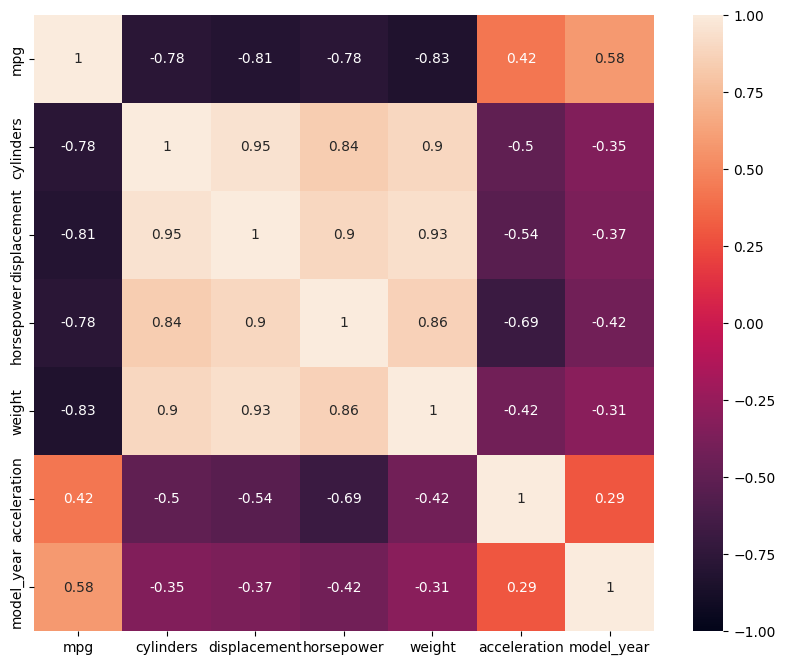

In [12]:
quantitativas = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
correlation = df[quantitativas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)

#### Ao observar o gráfico de correlação podemos perceber que:
* A variável ``mpg`` tem uma correlação negativa forte com várias variáveis, como ``cylinders``, ``displacement``, ``horsepower`` e ``weight``. Isso pode indicar que veículos com mais cilindros, maior deslocamento do motor, mais potência e mais peso tendem a ter menor eficiência de combustível.
* Existe uma correlação positiva moderada com ``model_year`` e ``acceleration``, sugerindo que carros mais novos e com melhor aceleração tendem a ser mais eficientes em termos de combustível.

#### Pergunta 4: Existe uma relação entre o número de cilindros (``cylinders``) e a potência do motor (``horsepower``)?

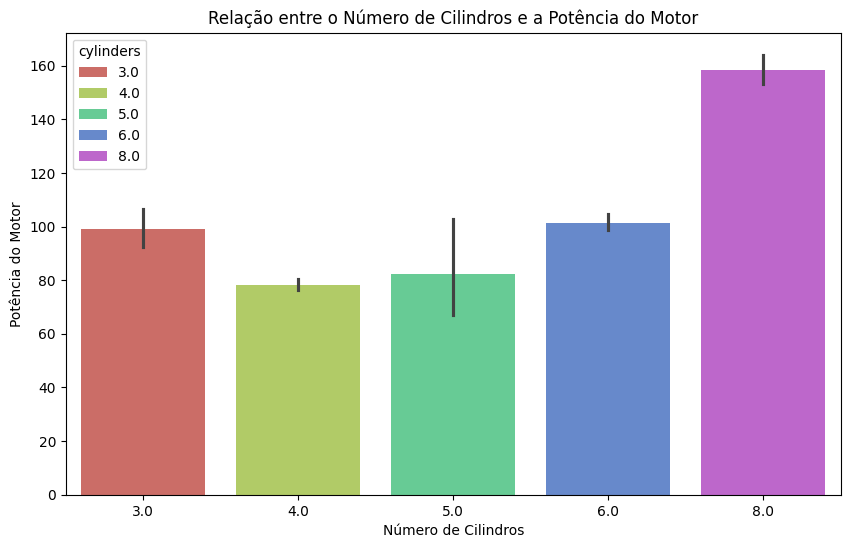

In [13]:
palette = sns.color_palette("hls", 5)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='cylinders', y='horsepower', hue='cylinders', palette=palette)

plt.title("Relação entre o Número de Cilindros e a Potência do Motor")
plt.xlabel("Número de Cilindros")
plt.ylabel("Potência do Motor")
plt.show()

#### Ao observar o gráfico de barras podemos notar que:
* Há uma tendência de que motores com mais cilindros têm maior potência
* Veículos com 8 cilindros têm uma potência significativamente maior em comparação com veículos com menos cilindros.

#### Pergunta 5: Qual é a distribuição da eficiência de combustível (``mpg``) em relação à origem do veículo (``origin``) e ao número de cilindros (``cylinders``)?

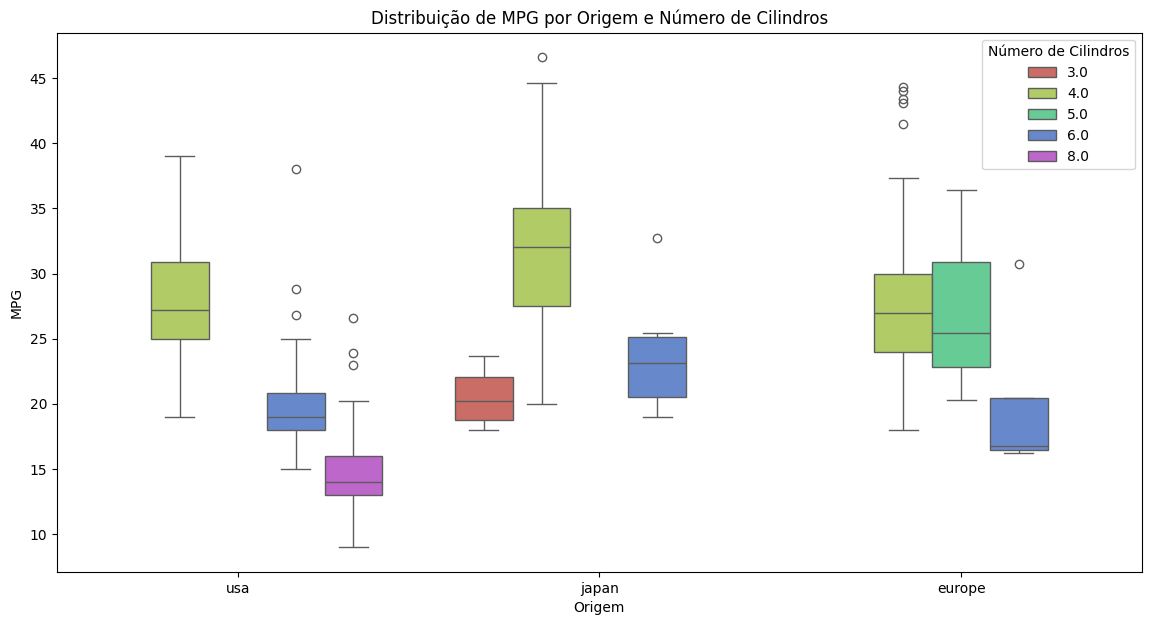

In [14]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='origin', y='mpg', hue='cylinders', palette=palette)

plt.title("Distribuição de MPG por Origem e Número de Cilindros")
plt.xlabel("Origem")
plt.ylabel("MPG")
plt.legend(title="Número de Cilindros")

#### Ao observar o gráfico boxplot podemos notar que:
* Em todas as regiões, carros com menos cilindros (3, 4 e 5) tendem a ter um mpg mais alto, indicando maior eficiência de combustível.
* Carros com 6 e 8 cilindros, especialmente nos EUA, têm um mpg significativamente menor, refletindo maior consumo de combustível.

#### Pergunta 6: A eficiência de combustível (``mpg``) variou ao longo dos anos de fabricação (``model_year``)?

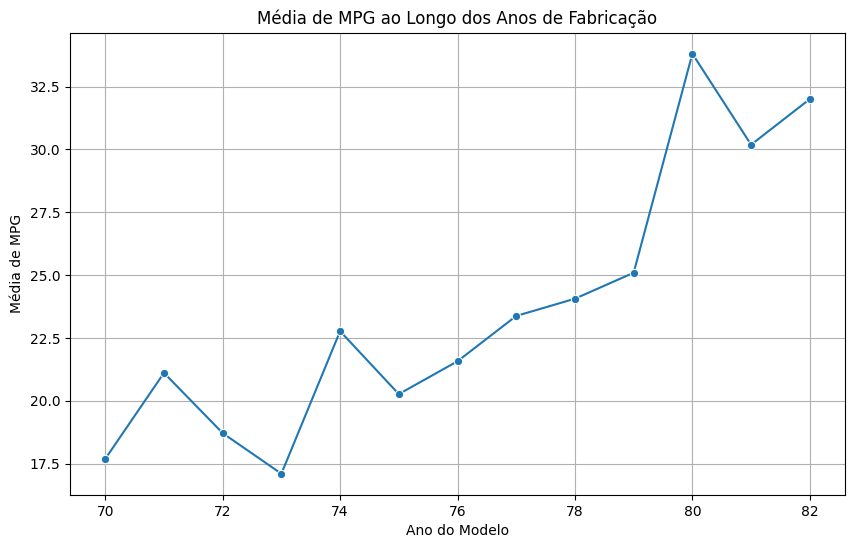

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='model_year', y='mpg', marker='o', errorbar=None)
plt.title("Média de MPG ao Longo dos Anos de Fabricação")
plt.xlabel("Ano do Modelo")
plt.ylabel("Média de MPG")
plt.grid(True)

#### Ao observar o gráfico de linhas podemos notar que: 
* Existe uma tendência geral de aumento na média de mpg ao longo do tempo. Isso sugere que os veículos se tornaram mais eficientes em termos de combustível ao longo dos anos.

#### Pergunta 7: O peso (``weight``) do veículo influencia na aceleração (``acceleration``)?

Text(0, 0.5, 'Aceleração')

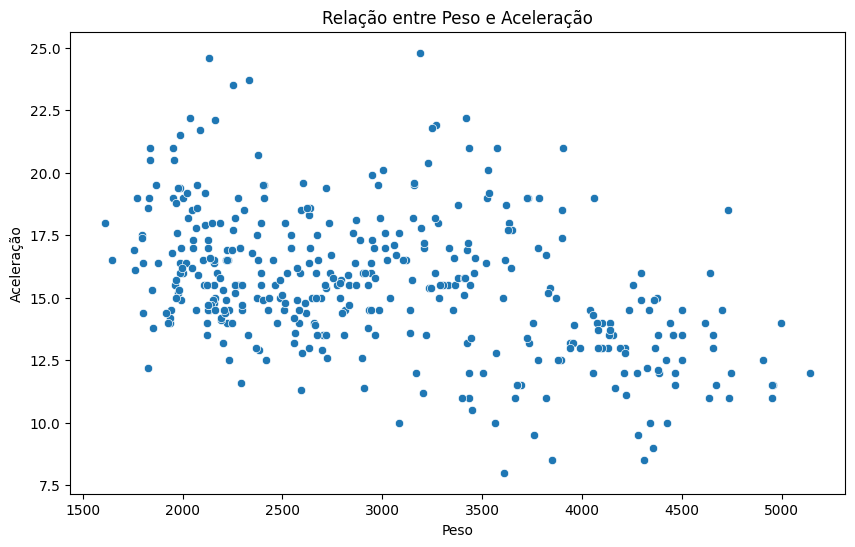

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight', y='acceleration')
plt.title("Relação entre Peso e Aceleração")
plt.xlabel("Peso")
plt.ylabel("Aceleração")

#### Ao observar o gráfico de dispersão podemos notar que:
* Há uma leve tendência negativa, sugerindo que veículos mais pesados tendem a ter uma aceleração menor. Isso faz sentido, já que veículos mais pesados geralmente exigem mais energia para acelerar, resultando em tempos de aceleração mais altos.
* A maior parte dos veículos está concentrada na faixa de peso entre 2.000 a 4.000 libras.

## 3. Insights
#### Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

* Existem três locais de origem identificados, sendo USA o mais frequente.
* A média de mgp mostra uma ampla variação na eficiência de combustível dos carros, com alguns sendo muito econômicos e outros menos.
* Os carros têm em média 5 cilindros, com variação entre 3 e 8 cilindros.
* O peso dos carros varia significativamente, de 1.613 a 5.140.
* Veículos com mais cilindros, maior deslocamento, mais potência e mais peso tendem a ser menos eficientes em termos de combustível.
* Motores com mais cilindros tendem a ter maior potência.
* Carros com menos cilindros (3, 4 e 5) tendem a ter um mpg mais alto.
* Existe uma tendência de aumento na média de mpg ao longo do tempo.